In [2]:
# Dependencies
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

# SQL Alchemy
from sqlalchemy import create_engine


In [7]:
# Create Engine - don't forget to remove password once done
engine = create_engine('postgresql://postgres:<put password here>@localhost:5432/HW-EmployeeSQL')
conn = engine.connect()

In [17]:
#create a dataframe from salary table,employee table, and title table
salary_df = pd.read_sql("SELECT * FROM salaries", conn)
employee_df=pd.read_sql("SELECT * FROM employees", conn)
title_df=pd.read_sql("SELECT * FROM job_title", conn)
employee_df=employee_df.rename(columns={'employee_title_id':'title_id'})

In [21]:
#merged the 3 tables into one
merged_df1=employee_df.merge(salary_df, on='employee_id', how='left')
merged_df2=merged_df1.merge(title_df,on='title_id', how='left')
merged_df2

,employee_id,title_id,birth_date,first_name,last_name,sex,hire_date,salary,title
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990,40000.0,Staff
1,475053,e0002,11/18/1954,Byong,Delgrande,F,9/07/1991,53422.0,Engineer
2,57444,e0002,1/30/1958,Berry,Babb,F,3/21/1992,48973.0,Engineer
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987,40000.0,Staff
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1/18/1991,40000.0,Senior Engineer
...,...,...,...,...,...,...,...,...,...
300019,464231,s0001,8/14/1958,Constantino,Eastman,M,10/28/1988,69696.0,Staff
300020,255832,e0002,5/08/1955,Yuping,Dayang,F,2/26/1995,75355.0,Engineer
300021,76671,s0001,6/09/1959,Ortrud,Plessier,M,2/24/1988,61886.0,Staff
300022,264920,s0001,9/22/1959,Percy,Samarati,F,9/08/1994,62772.0,Staff


In [102]:
merged_df2["Salary Range"]=""

for row in range(len(merged_df2)):
    if merged_df2.iloc[row,7]<=60000:
        merged_df2.iloc[row,9]='40k to 60k'
    elif merged_df2.iloc[row,7]<=80000:
        merged_df2.iloc[row,9]='60k to 80k'
    elif merged_df2.iloc[row,7]<=100000:
        merged_df2.iloc[row,9]='80k to 100k'
    elif merged_df2.iloc[row,7]<=120000:
        merged_df2.iloc[row,9]='100k to 120k'
    else:
        merged_df2.iloc[row,9]='greater than 120k'

#please note that the above codes took 1,754 seconds to run

merged_df2

,employee_id,title_id,birth_date,first_name,last_name,sex,hire_date,salary,title,Salary Range
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990,40000.0,Staff,40k to 60k
1,475053,e0002,11/18/1954,Byong,Delgrande,F,9/07/1991,53422.0,Engineer,40k to 60k
2,57444,e0002,1/30/1958,Berry,Babb,F,3/21/1992,48973.0,Engineer,40k to 60k
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987,40000.0,Staff,40k to 60k
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1/18/1991,40000.0,Senior Engineer,40k to 60k
...,...,...,...,...,...,...,...,...,...,...
300019,464231,s0001,8/14/1958,Constantino,Eastman,M,10/28/1988,69696.0,Staff,60k to 80k
300020,255832,e0002,5/08/1955,Yuping,Dayang,F,2/26/1995,75355.0,Engineer,60k to 80k
300021,76671,s0001,6/09/1959,Ortrud,Plessier,M,2/24/1988,61886.0,Staff,60k to 80k
300022,264920,s0001,9/22/1959,Percy,Samarati,F,9/08/1994,62772.0,Staff,60k to 80k


In [103]:
#save merged df as csv to save time from running the previous loop code
merged_df2.to_csv('merged_employee_df.csv')


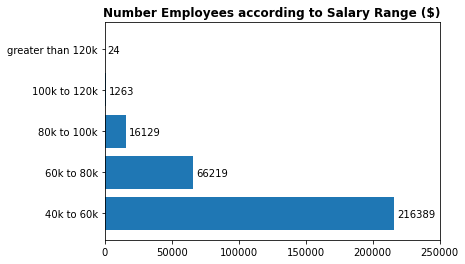

In [173]:
salary_range_df=pd.DataFrame(merged_df2['Salary Range'].value_counts())

x= ['40k to 60k', '60k to 80k', '80k to 100k', '100k to 120k',
       'greater than 120k']

plt.barh(x,salary_range_df['Salary Range'])
plt.xlim(0,250000)
plt.title('Number Employees according to Salary Range ($)', fontweight='bold')
for index, value in enumerate(salary_range_df['Salary Range']):
    plt.text(value+2000,index-0.1, str(value))

plt.savefig("Employee Count based on Salary Range")

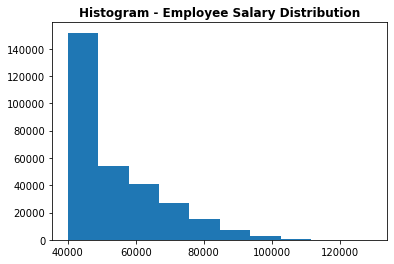

In [188]:
plt.hist(merged_df2['salary'])
plt.title('Histogram - Employee Salary Distribution', fontweight='bold')
plt.savefig("Histogram - Employee Salary Distribution")

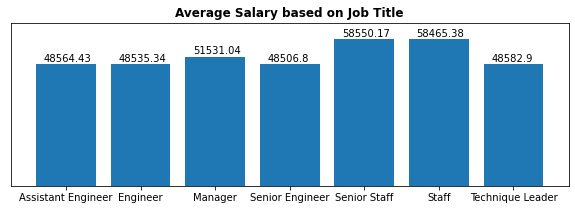

In [243]:
avg_salary_title=pd.DataFrame(round(merged_df2.groupby('title')['salary'].mean(),2))

x=['Assistant Engineer', 'Engineer', 'Manager', 'Senior Engineer',
       'Senior Staff', 'Staff', 'Technique Leader']

plt.figure (figsize=(10,3))
plt.bar(x, avg_salary_title['salary'])
plt.ylim(0,65000)
plt.title('Average Salary based on Job Title', fontweight='bold')
for index, value in enumerate(avg_salary_title['salary']):
    plt.text(index-0.3, value+1000, str(value))

plt.yticks([])
plt.savefig("Average Salary based on Job Title")